In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import re

import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import files

# Use the upload() function to select and upload the CSV file
uploaded = files.upload()


Saving CarPrice_Assignment.csv to CarPrice_Assignment (2).csv


In [7]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [9]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [11]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

AttributeError: ignored

In [15]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
df.describe(include=object)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [18]:
# create a function to visualize the numerical columns
def histogram(column_name):
    sns.histplot(data=df[column_name], bins=20, kde=True)
    plt.title(column_name+' distribution')
    plt.show()

In [19]:
# create a function to visualize the categrical columns
def count_plot(column):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f"Count Plot - {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()

In [20]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [22]:
# create a function to fix the CarName column
def clean_car_name(car_name):
    return car_name.split(" ")[0].lower()

In [23]:
# apply the clean_car_name function to the CarName column
df['CarName'] = df['CarName'].apply(clean_car_name)

In [24]:
# see the unique values after fixing
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [25]:
# Fix typos
df['CarName'] = df['CarName'].str.replace('vw', 'volkswagen')
df['CarName'] = df['CarName'].str.replace('vokswagen', 'volkswagen')
df['CarName'] = df['CarName'].str.replace('toyouta', 'toyota')
df['CarName'] = df['CarName'].str.replace('maxda', 'mazda')
df['CarName'] = df['CarName'].str.replace('porcshce', 'porsche')

In [26]:
# see the unique values after fixing typos
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

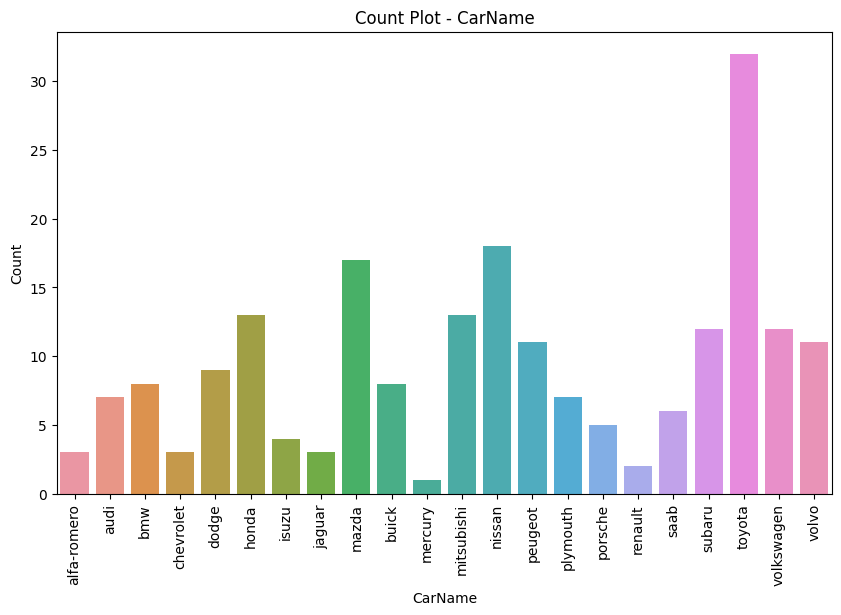

In [27]:
# visualize the CarName column using count_plot function
count_plot('CarName')

In [28]:
df['fueltype'].value_counts().reset_index()

,index,fueltype
0,gas,185
1,diesel,20


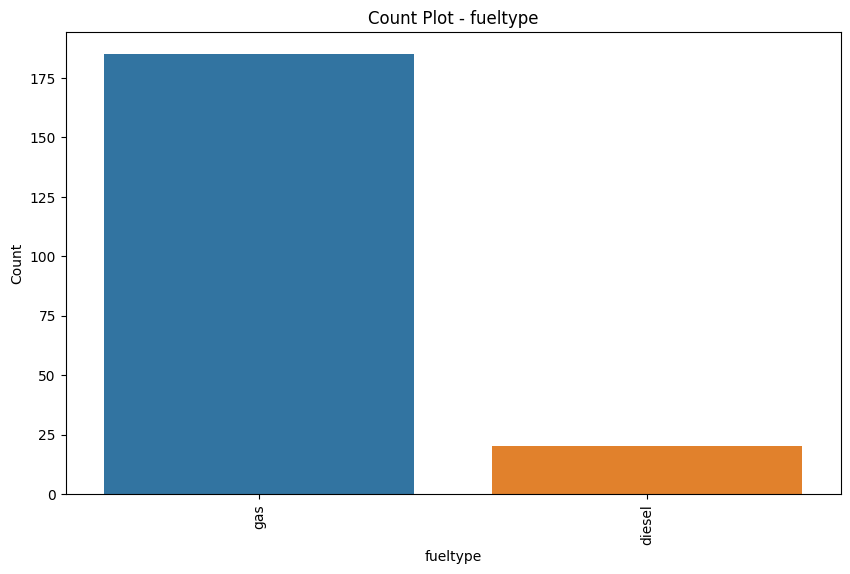

In [29]:
# visualize the fueltype Column using count_plot function
count_plot('fueltype')

In [30]:
df['aspiration'].value_counts().reset_index()

,index,aspiration
0,std,168
1,turbo,37


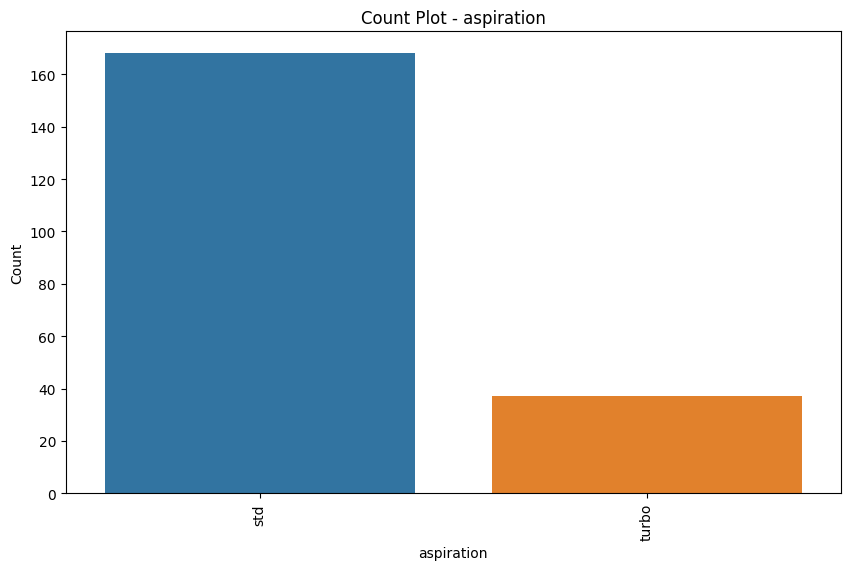

In [31]:
# visualize the aspiration column using count_plot function
count_plot('aspiration')

In [32]:
df['doornumber'].value_counts().reset_index()

,index,doornumber
0,four,115
1,two,90


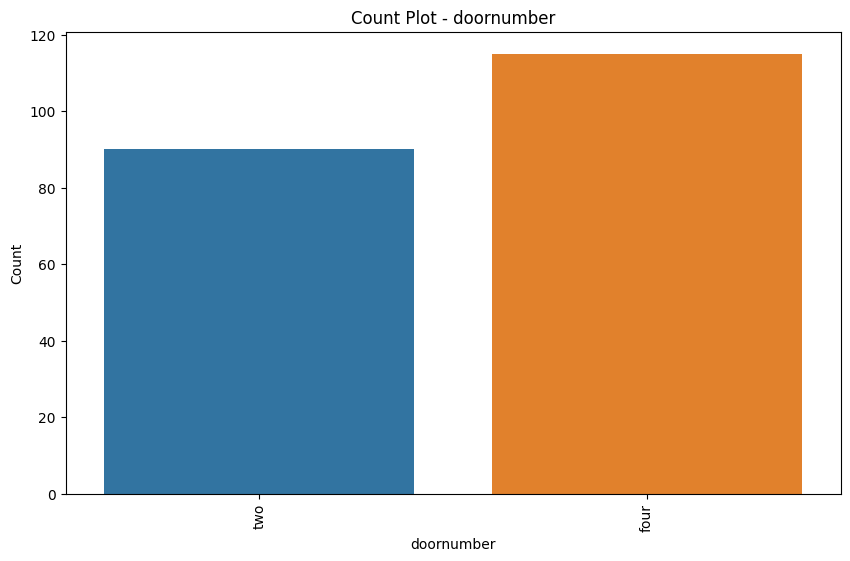

In [33]:
# visualize the doornumber column using count_plot function
count_plot('doornumber')

In [34]:
df['carbody'].value_counts().reset_index()

,index,carbody
0,sedan,96
1,hatchback,70
2,wagon,25
3,hardtop,8
4,convertible,6


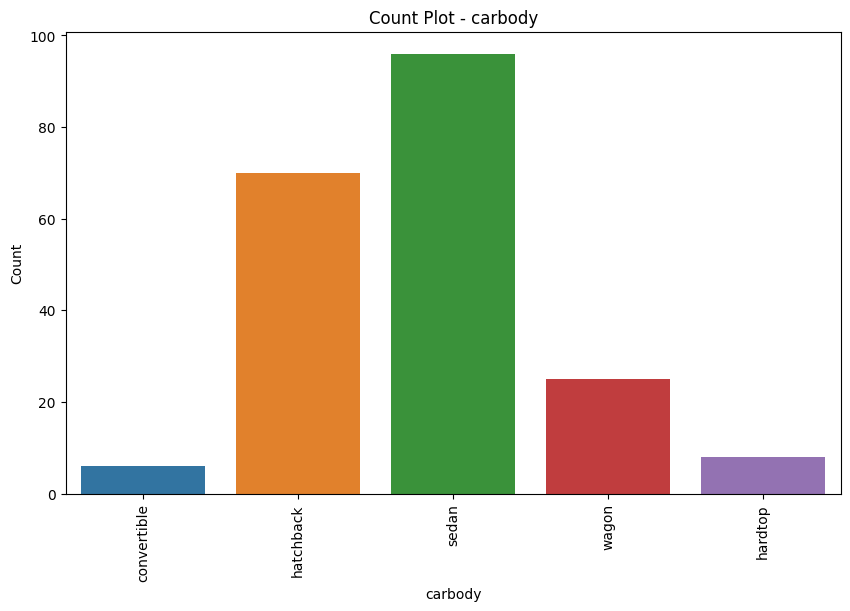

In [35]:
# visualize the carbody column using count_plot function
count_plot('carbody')

In [36]:
df['drivewheel'].value_counts().reset_index()

,index,drivewheel
0,fwd,120
1,rwd,76
2,4wd,9


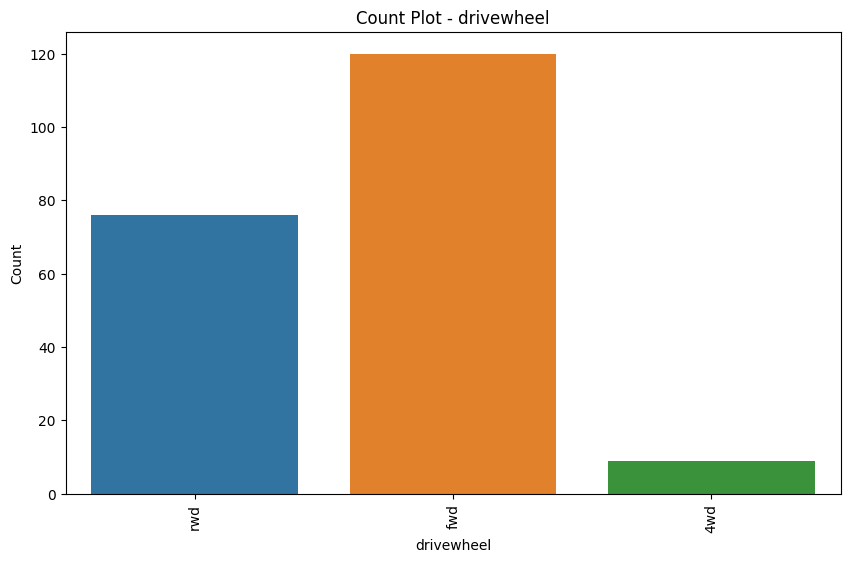

In [37]:
# visualize the drivewheel column using count_plot function
count_plot('drivewheel')

In [38]:
df['enginelocation'].value_counts().reset_index()

,index,enginelocation
0,front,202
1,rear,3


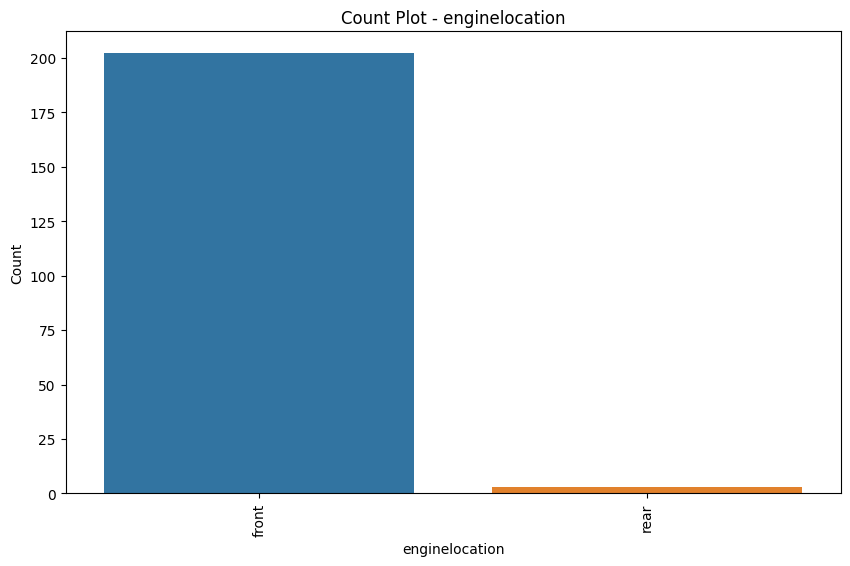

In [39]:
# visualize the enginelocation column using count_plot function
count_plot('enginelocation')

In [40]:
df['enginetype'].value_counts().reset_index()

,index,enginetype
0,ohc,148
1,ohcf,15
2,ohcv,13
3,dohc,12
4,l,12
5,rotor,4
6,dohcv,1


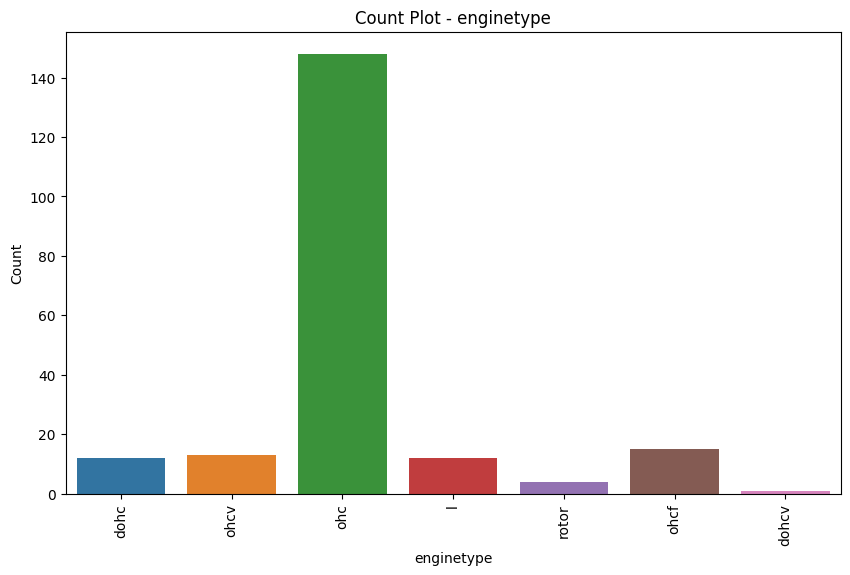

In [41]:
# visualize the enginetype column using the count_plot function
count_plot('enginetype')

In [42]:
df['cylindernumber'].value_counts().reset_index()

,index,cylindernumber
0,four,159
1,six,24
2,five,11
3,eight,5
4,two,4
5,three,1
6,twelve,1


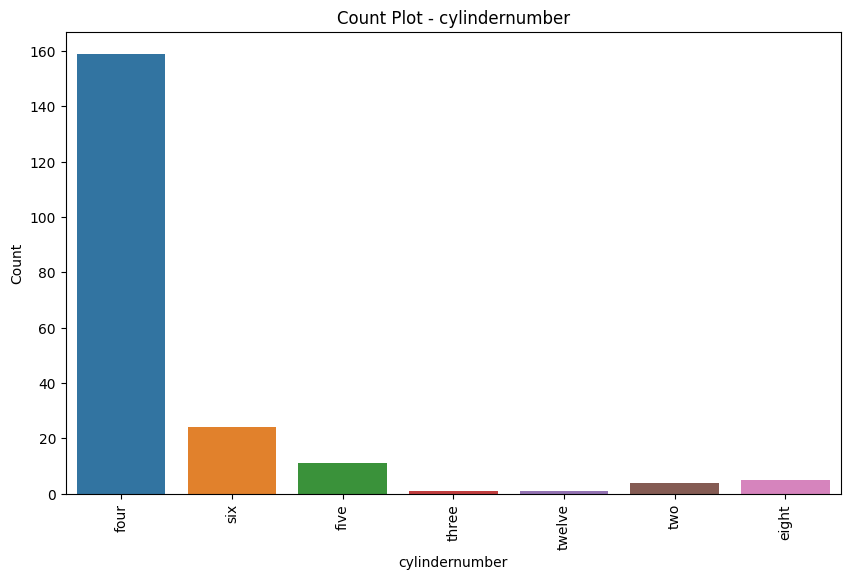

In [43]:
# visualize the cylindernumber column using count_plot function
count_plot('cylindernumber')

In [44]:
df['fuelsystem'].value_counts().reset_index()

,index,fuelsystem
0,mpfi,94
1,2bbl,66
2,idi,20
3,1bbl,11
4,spdi,9
5,4bbl,3
6,mfi,1
7,spfi,1


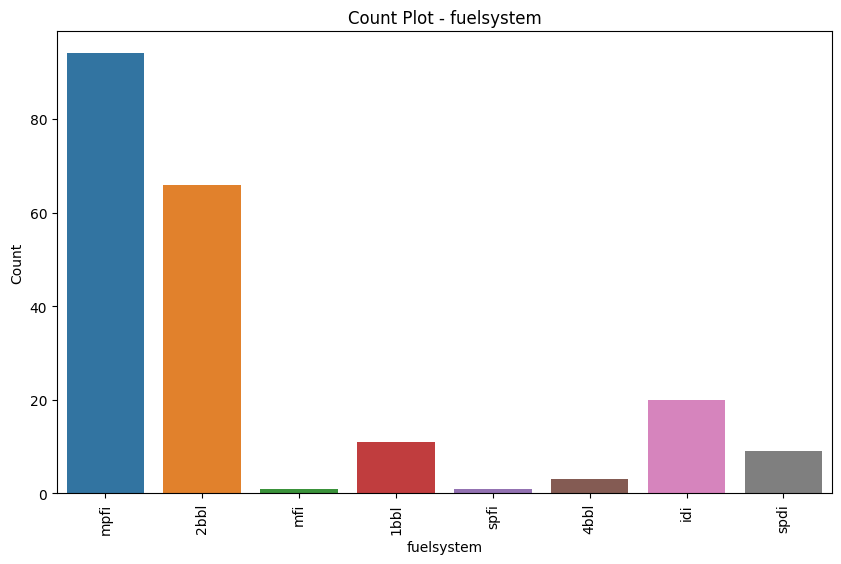

In [45]:
# visualize the fuelsystem column using count_plot function
count_plot('fuelsystem')

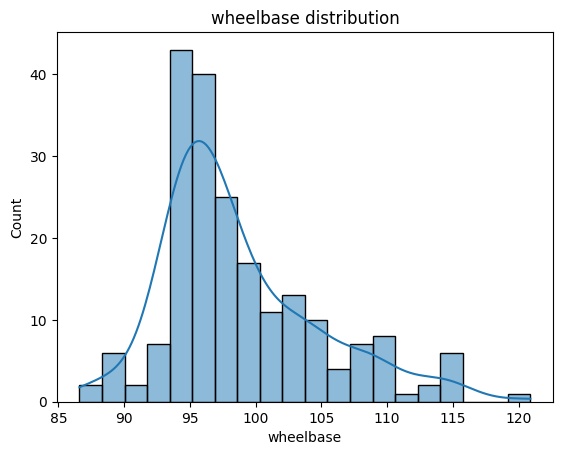

In [46]:
# visualize the wheelbase column using histogram function
histogram('wheelbase')

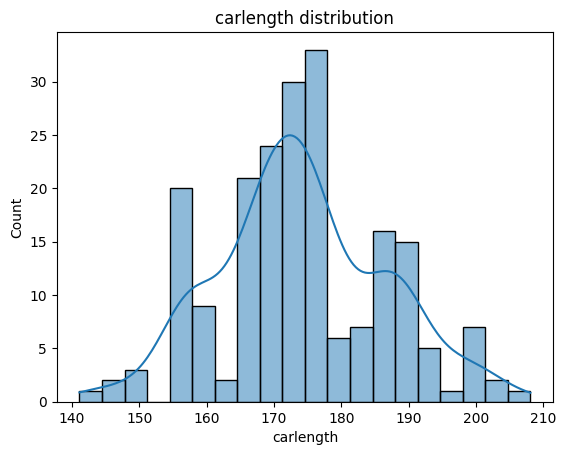

In [47]:
# visualize the carlength column using histogram function
histogram('carlength')

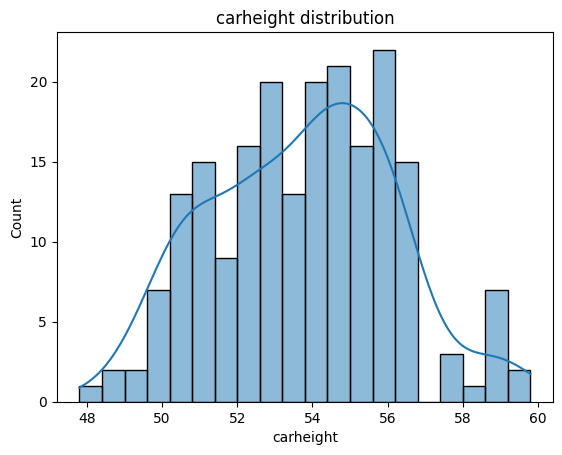

In [48]:
# visualize the carheight column using histogram function
histogram('carheight')

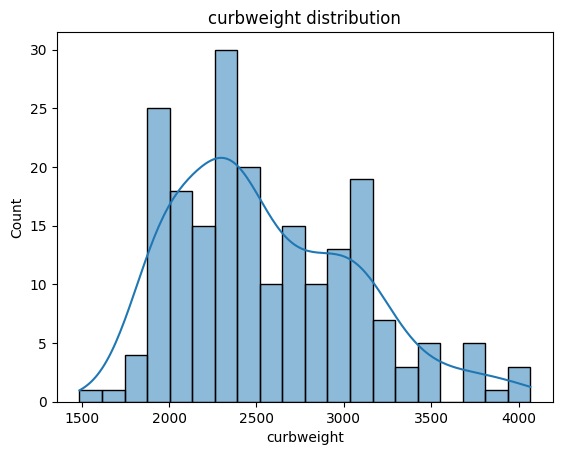

In [49]:
# visualize the curbweight column using histogram function
histogram('curbweight')

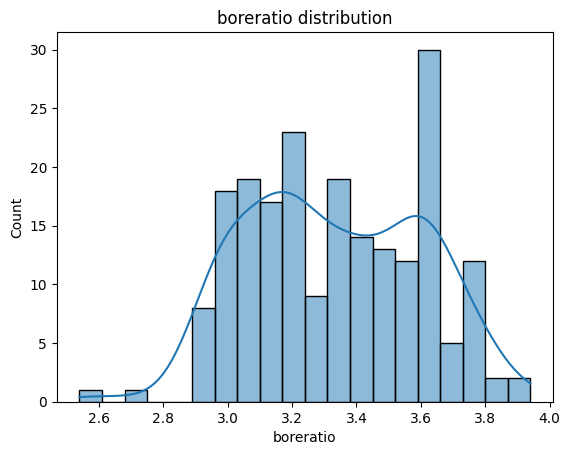

In [50]:
# visualize the boreratio column using histogram function
histogram('boreratio')

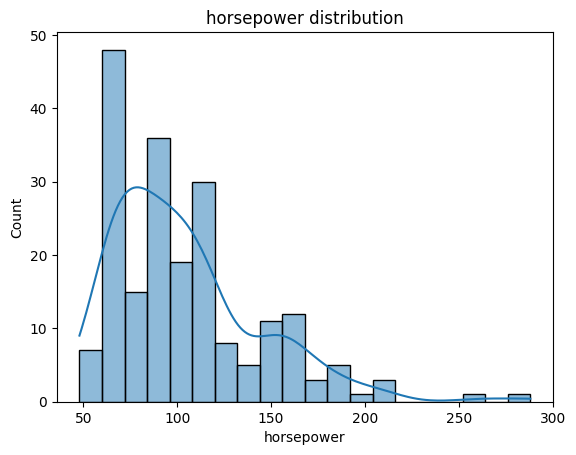

In [51]:
# visualize the horsepower column using histogram function
histogram('horsepower')

In [52]:
# list each of Categorical and Numerical columns
categorical_columns = df.select_dtypes(include=object).columns.tolist()
numerical_columns = df.select_dtypes(exclude=object).columns.tolist()

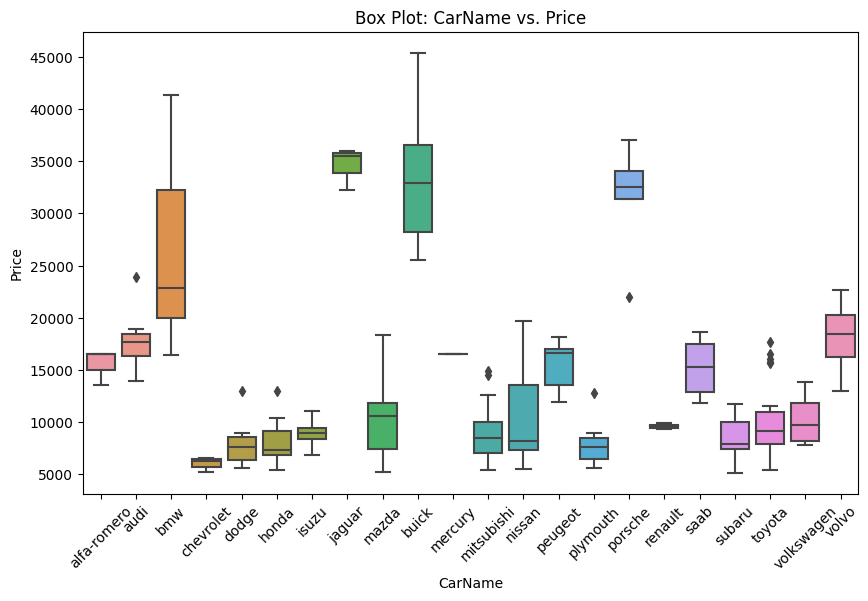

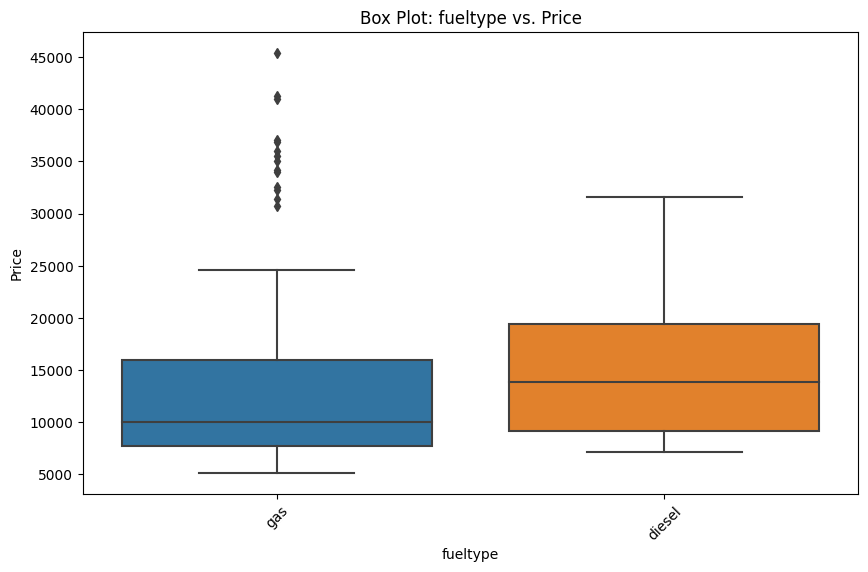

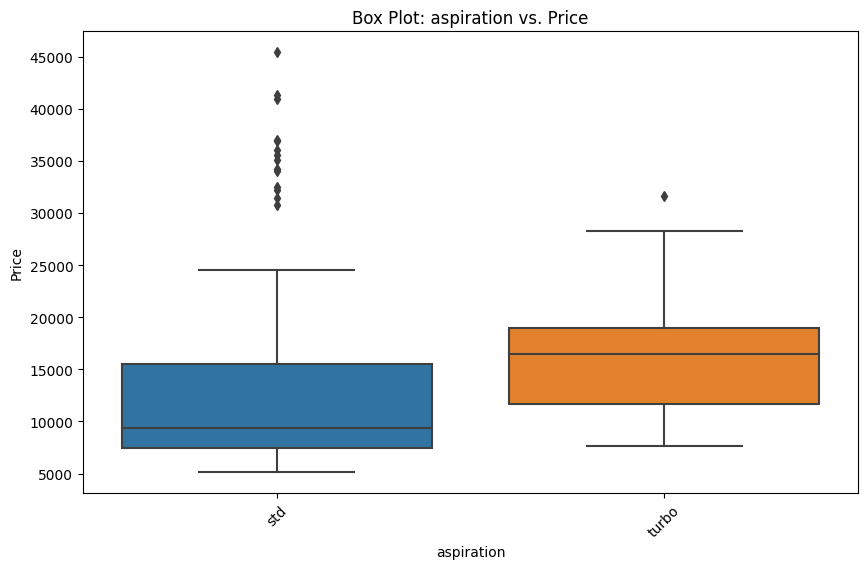

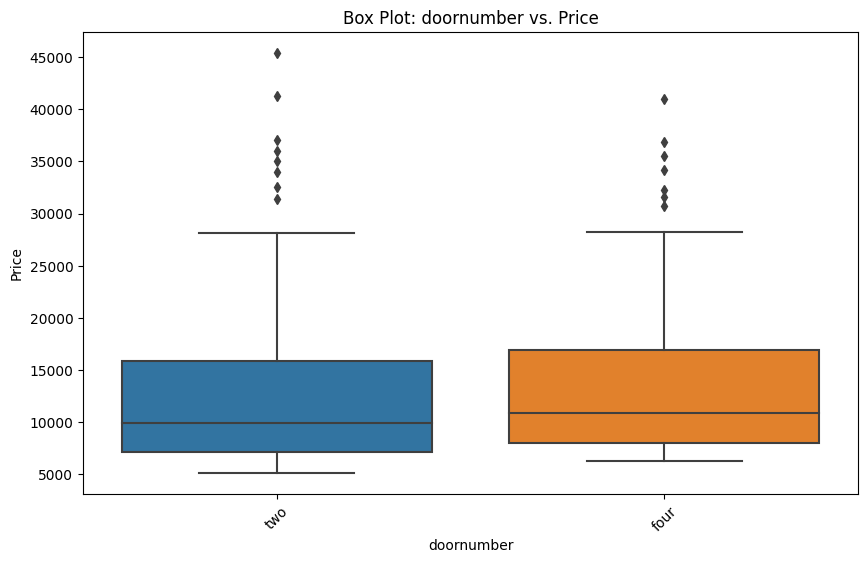

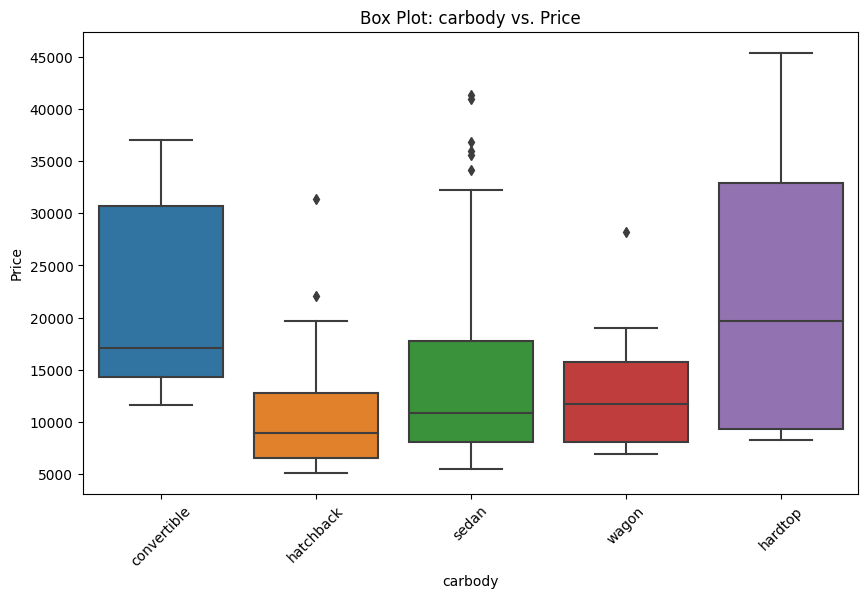

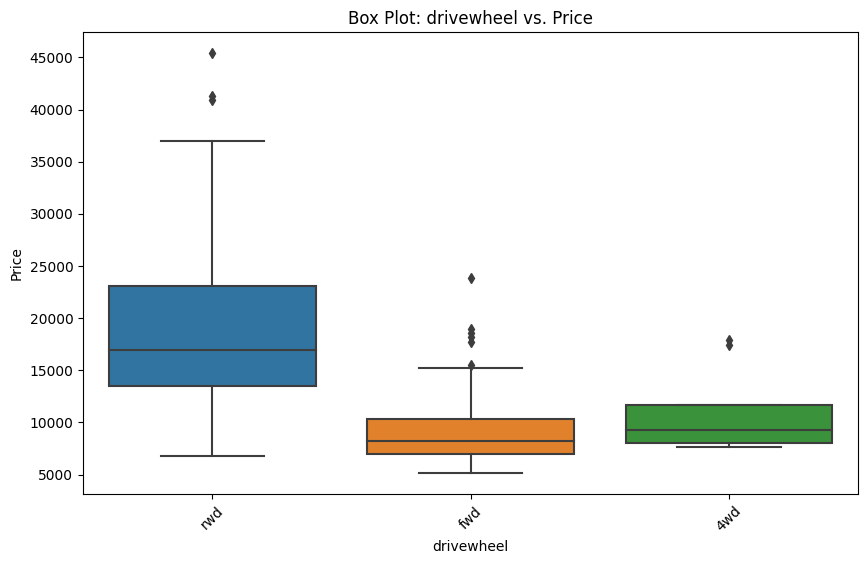

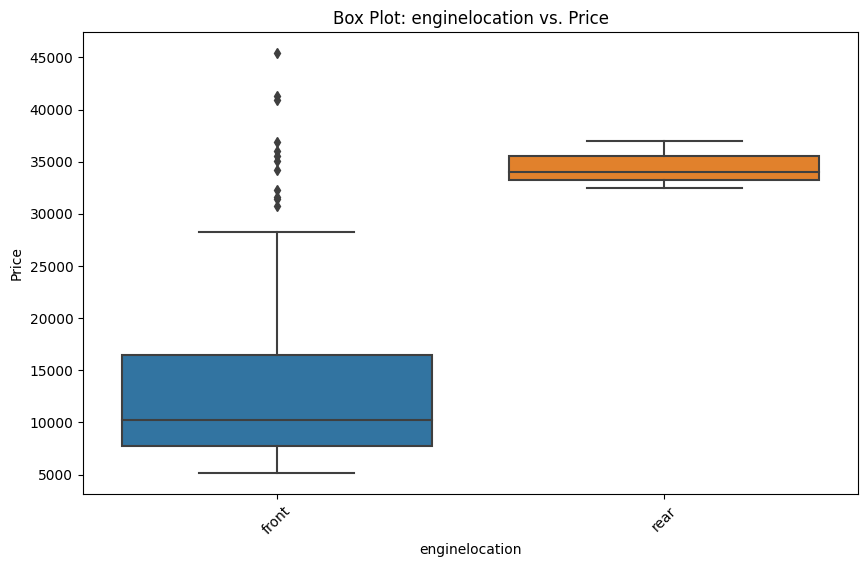

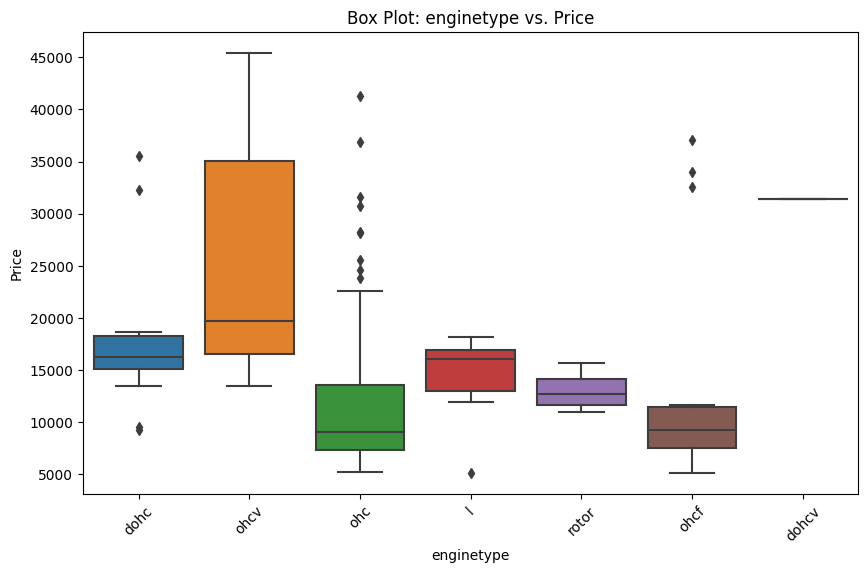

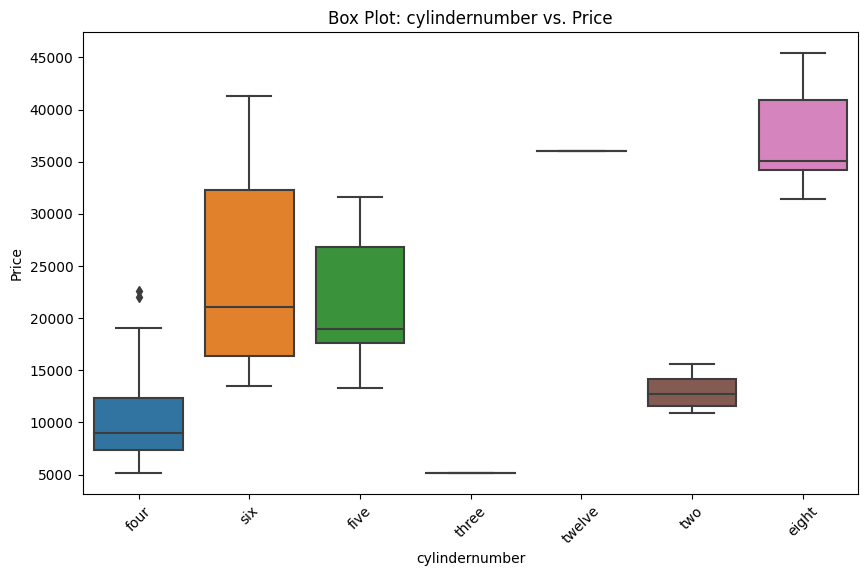

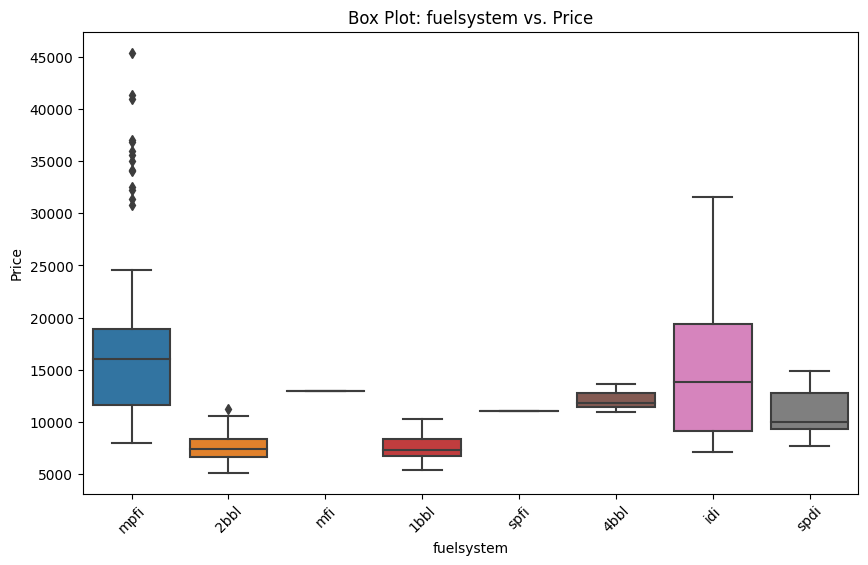

In [53]:
# Create box plots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='price', data=df)
    plt.title(f'Box Plot: {column} vs. Price')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.show()

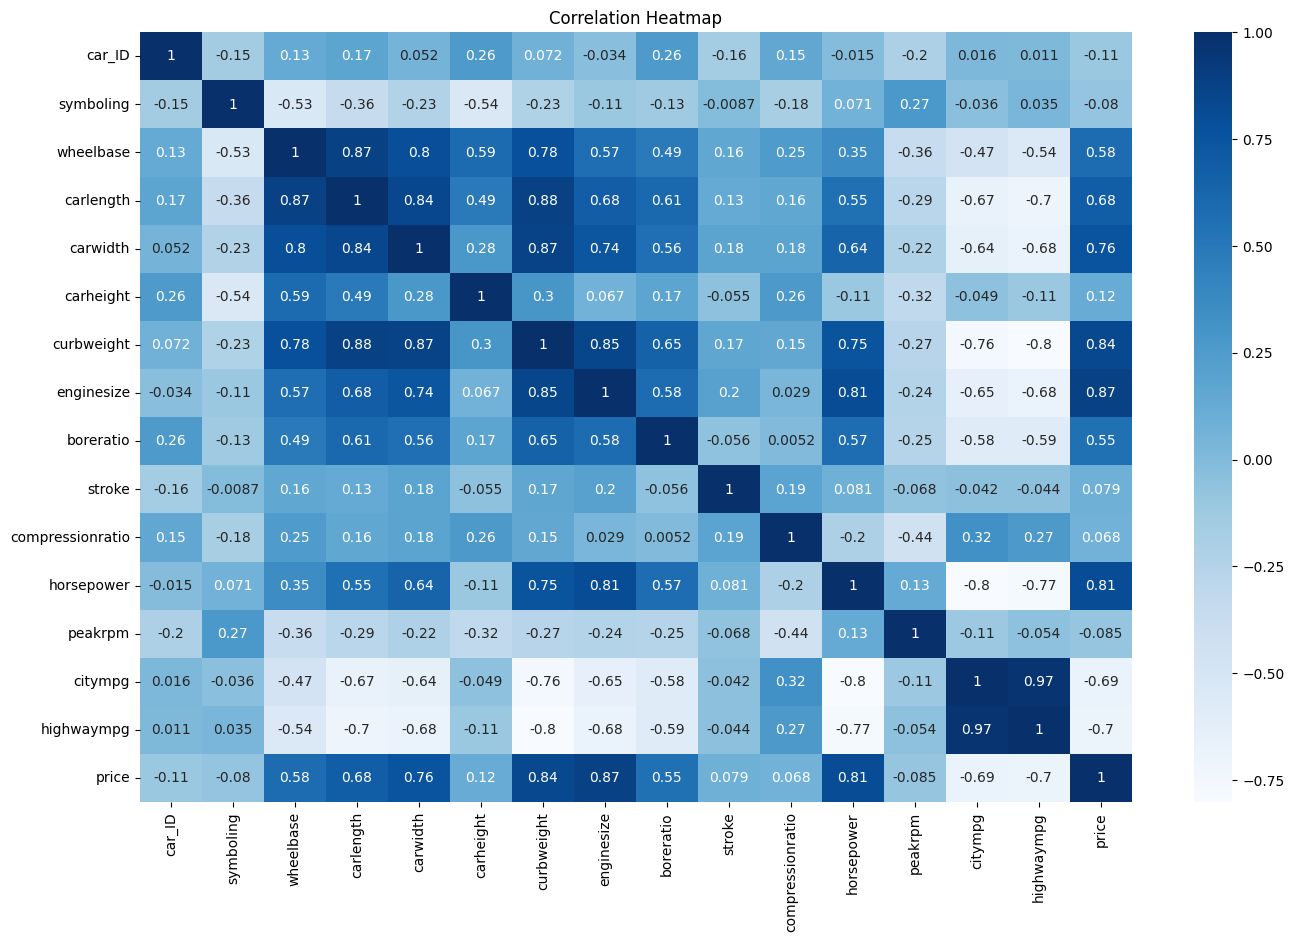

In [54]:
#now we will visualize the relation between each numerical column and price column
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

In [55]:
# list the dropped columns
dropped_columns = ['car_ID', 'symboling']

df.drop(columns=dropped_columns, inplace=True)

In [56]:
numerical_columns.remove('car_ID')
numerical_columns.remove('symboling')

In [57]:
# use label encoder to encode the categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [58]:
# use scaler to scale the numerical columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [59]:
X = df.drop(['price', 'CarName'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
model.score(X_train, y_train)

0.8961468790198356

In [62]:
y_pred = model.predict(X_test)

In [63]:
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test,y_pred)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: 0.7982475638042225
Mean Squared Error: 0.2507800223193133
